In [18]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.model_selection import train_test_split
from sklearn import cross_validation
from sklearn.preprocessing import Imputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt2

In [19]:
from scipy import integrate
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif,chi2
from sklearn.preprocessing import Binarizer, scale
from sklearn.utils import resample

In [2]:
#Reading Data
Data = pd.read_csv("/Users/panagiotistheodoratos/Downloads/train.csv",sep=",",low_memory=False)

Data.info()

In [5]:
Data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [22]:
#Checking Target
(len(Data['TARGET']) - len(Data[ Data['TARGET']==0 ]['TARGET']) )/len(Data['TARGET']) * 100
 

3.9568534596158904

It seems that it is an unbalanced problem as only 3.95% belongs to unsatisfied category

In [7]:
#Checking nas
Data.isnull().sum()

ID                               0
var3                             0
var15                            0
imp_ent_var16_ult1               0
imp_op_var39_comer_ult1          0
imp_op_var39_comer_ult3          0
imp_op_var40_comer_ult1          0
imp_op_var40_comer_ult3          0
imp_op_var40_efect_ult1          0
imp_op_var40_efect_ult3          0
imp_op_var40_ult1                0
imp_op_var41_comer_ult1          0
imp_op_var41_comer_ult3          0
imp_op_var41_efect_ult1          0
imp_op_var41_efect_ult3          0
imp_op_var41_ult1                0
imp_op_var39_efect_ult1          0
imp_op_var39_efect_ult3          0
imp_op_var39_ult1                0
imp_sal_var16_ult1               0
ind_var1_0                       0
ind_var1                         0
ind_var2_0                       0
ind_var2                         0
ind_var5_0                       0
ind_var5                         0
ind_var6_0                       0
ind_var6                         0
ind_var8_0          

In [8]:
#Imputation with median in case anything is missing
im = Imputer(strategy='median')
im.fit(Data)
Datatemp = im.transform(Data)
Data=pd.DataFrame(Datatemp, columns=Data.columns)
Data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0.0
1,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0.0
2,4.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0.0
3,8.0,2.0,37.0,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0.0
4,10.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0.0


In [9]:
# remove duplicated columns
def rmv_dublicated(df_train):
    remove = []
    c = df_train.columns
    for i in range(len(c)-1):
        v = df_train[c[i]].values
        for j in range(i+1,len(c)):
            if np.array_equal(v,df_train[c[j]].values):
                remove.append(c[j])
    print("Duplicated columes: ",remove)
    df_train.drop(remove, axis=1, inplace=True)
    # Let's look at the size of the train dataset
    print("After simple preprocess, train:  nrows %d, ncols %d" % df_train.shape)

In [10]:
rmv_dublicated(Data)  

Duplicated columes:  ['ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp

In [11]:
# remove constant columns
def rmv_constant(df_train):
    remove = []
    for col in df_train.columns:
        if df_train[col].std() == 0:
            remove.append(col)
    print("Constant columes: ",remove)
    df_train.drop(remove, axis=1, inplace=True)
               
rmv_constant(Data) 

Constant columes:  ['ind_var2_0']


    Running non parametric correlations to check target relationship witht the rest of the varibles

In [12]:
Cordf = Data[Data.columns].corr(method='spearman')['TARGET'].sort_values()
Cordf = Cordf.to_frame().reset_index()
Cordf['Abs Corr.'] = [abs(x) for x in Cordf['TARGET']]
Cordf.sort_values('Abs Corr.', inplace=True, ascending=False)
Cordf.reset_index(inplace=True,drop=True)
Cordf

,index,TARGET,Abs Corr.
0,TARGET,1.000000,1.000000
1,ind_var30,-0.149811,0.149811
2,num_var30,-0.145473,0.145473
3,num_meses_var5_ult3,-0.142440,0.142440
4,num_var42,-0.138909,0.138909
5,var15,0.135482,0.135482
6,ind_var5,-0.135349,0.135349
7,num_var5,-0.134730,0.134730
8,saldo_var30,-0.131071,0.131071
9,saldo_var42,-0.121241,0.121241


In [13]:
#Separating Target 
X=Data[Data.columns.difference(['TARGET','Unnamed: 0', 'ID'])]
y=Data['TARGET']


In [14]:
# Check what features are selected  based on chi2 and f_classif
p = 3 # Third Quantile
 
X_bin = Binarizer().fit_transform(scale(X))
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_bin, y)
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y)
 
chi2_selected = selectChi2.get_support()
chi2_selected_features = [ f for i,f in enumerate(X.columns) if chi2_selected[i]]
print('Chi2 selected {} features {}.'.format(chi2_selected.sum(),
   chi2_selected_features))
f_classif_selected = selectF_classif.get_support()
f_classif_selected_features = [ f for i,f in enumerate(X.columns) if f_classif_selected[i]]
print('F_classif selected {} features {}.'.format(f_classif_selected.sum(),
   f_classif_selected_features))
selected = chi2_selected & f_classif_selected
print('Chi2 & F_classif selected {} features'.format(selected.sum()))
features = [ f for f,s in zip(X.columns, selected) if s]
print (features)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Chi2 selected 9 features ['ind_var30', 'ind_var5', 'num_meses_var5_ult3', 'num_var30', 'num_var42', 'num_var5', 'saldo_var30', 'var15', 'var36'].
F_classif selected 10 features ['ind_var30', 'ind_var5', 'num_meses_var5_ult3', 'num_var30', 'num_var35', 'num_var4', 'num_var42', 'num_var5', 'var15', 'var36'].
Chi2 & F_classif selected 8 features
['ind_var30', 'ind_var5', 'num_meses_var5_ult3', 'num_var30', 'num_var42', 'num_var5', 'var15', 'var36']


    As it is an unbalanced problem we will fit a Random Forest with a balanced class weight 

In [23]:
#Train and test split and run of random forest with balanced
columns=['TARGET', 'ID']
X=Data.drop(columns, axis=1)
y=Data['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=12)
clf = RandomForestClassifier(random_state=10,n_estimators=300,class_weight="balanced")
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=1, oob_score=False, random_state=10,
            verbose=0, warm_start=False)

In [25]:
def print_results(X_train, X_test, y_train, y_test,clf):
    # Create actual  names for  each predicted category
    prediction_train = clf.predict(X_train)
    prediction_test = clf.predict(X_test)
    # Create confusion matrix train
    print(" Confusion matrix on train:\n",
          pd.crosstab(y_train, prediction_train, rownames=[' Actual Unsat.'], colnames=['Predicted Unsat.']))
    # Create confusion matrix test
    print("\n", "Confusion matrix on test:\n",
          pd.crosstab(y_test, prediction_test, rownames=[' Actual Unsat.'], colnames=['Predicted Unsat.']))
    print("\n", "Train precision score :", '%.2f' % (precision_score(y_train.values, prediction_train) * 100), "%")
    print(" Train recall score    :", '%.2f' % (recall_score(y_train.values, prediction_train) * 100), "%")
    print(" Test precision score  :", '%.2f' % (precision_score(y_test.values, prediction_test) * 100), "%")
    print(" Test recall score     :", '%.2f' % (recall_score(y_test.values, prediction_test) * 100), "%")
    print(" Accuracy on train     :", '%.2f' % (metrics.accuracy_score(y_train, prediction_train) * 100), "%")
    print(" Accuracy on test      :", '%.2f' % (metrics.accuracy_score(y_test, prediction_test) * 100), "%")
   # AUC and Gini train
    predstrainprob = clf.predict_proba(X_train)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_train, predstrainprob, pos_label=1)
    print(" AUC Train:", metrics.auc(fpr, tpr))
    print(" Gini Train:", 2 * metrics.auc(fpr, tpr) - 1)
    # AUC and Gini test
    predstestprob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predstestprob, pos_label=1)
    print(" AUC Test:", metrics.auc(fpr, tpr))
    print(" Gini Test:", 2 * metrics.auc(fpr, tpr) - 1)
 
print_results(X_train, X_test, y_train, y_test,clf)

 Confusion matrix on train:
 Predicted Unsat.    0.0   1.0
 Actual Unsat.               
0.0               50263   811
1.0                  21  2119

 Confusion matrix on test:
 Predicted Unsat.    0.0  1.0
 Actual Unsat.              
0.0               21410  528
1.0                 777   91

 Train precision score : 72.32 %
 Train recall score    : 99.02 %
 Test precision score  : 14.70 %
 Test recall score     : 10.48 %
 Accuracy on train     : 98.44 %
 Accuracy on test      : 94.28 %
 AUC Train: 0.9921969414728637
 Gini Train: 0.9843938829457275
 AUC Test: 0.7638953073870096
 Gini Test: 0.5277906147740192


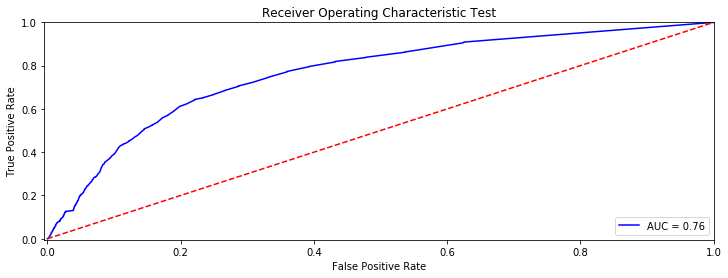

In [26]:
def create_roc_curve(y_test,X_test,clf):
    prob_test=clf.predict_proba(X_test)[:, 1]
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, prob_test, pos_label=1)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic Test')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
             label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.005, 1.0])
    plt.ylim([-0.005, 1.0])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
create_roc_curve(y_test,X_test,clf)    

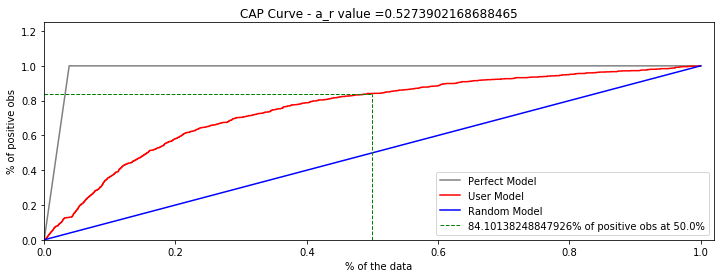

In [27]:
def cap_curve(y_test,X_test,clf):
    y_values=y_test
    y_preds_proba=clf.predict_proba(X_test)[:, 1]
    num_pos_obs = int(np.sum(y_values))
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s=pd.DataFrame(data=y_cap)
    y_cap_df_s.index.names=['index']
    y_cap_df_s=y_cap_df_s.sort_values([1], ascending=False).reset_index('index', drop=True)
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:len(y_values)-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    percent = 0.5
    row_index = np.trunc(num_count * percent)
    row_index=int(row_index)
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    #ar_label = 'ar value = %s' % ar_value
    fig, ax = plt.subplots(nrows = 1, ncols = 1)
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='User Model')
#ax.scatter(xx,yy, color='red')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    plt2.xlim(0, 1.02)
    plt2.ylim(0, 1.25)
    plt2.title("CAP Curve - a_r value ="+str(ar_value))
    plt2.xlabel('% of the data')
    plt2.ylabel('% of positive obs')
    plt2.legend()
    plt2.show()
cap_curve(y_test,X_test,clf)    

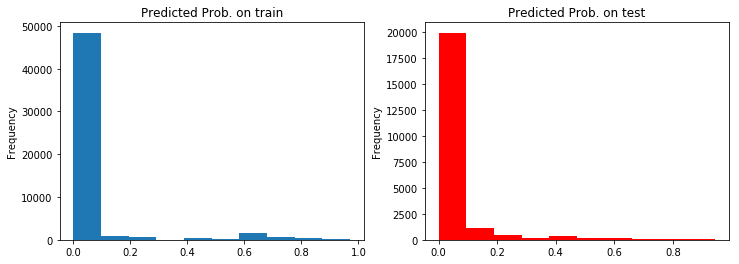

In [28]:
def prob_plot(X_train,X_test,clf):
    fig,axs=plt.subplots(1,2)
    predstrainprob= clf.predict_proba(X_train)[:,1]
    Probtrain=pd.Series(predstrainprob)
    Probtrain.plot(kind='hist',title='Predicted Prob. on train',ax=axs[0])
    predstestnprob= clf.predict_proba(X_test)[:,1]
    Probtest=pd.Series(predstestnprob)
    Probtest.plot(kind='hist',title='Predicted Prob. on test',ax=axs[1],color='red')
prob_plot(X_train,X_test,clf)

In [29]:
def decile_cut(y_train,x_train,clf,cut):
    y_values=y_train.values
    y_preds_proba=clf.predict_proba(x_train)[:, 1]
    y_cap = np.c_[y_values,y_preds_proba]
    tempdf=pd.DataFrame(data=y_cap)
    tempdf=tempdf.sort_values([1], ascending=False)#.reset_index('index', drop=True)
    tempdf['Decile']=pd.qcut(tempdf[1], cut,duplicates='drop')
    tempdf.rename(columns={0 : 'TARGET SUM', 1 : 'Prob'},inplace=True)
    tempdf.groupby('Decile').agg({'TARGET SUM': np.sum, 'Decile': np.size})
    results=pd.DataFrame(tempdf.groupby('Decile').agg({'TARGET SUM': np.sum, 'Decile': np.size}))
    results.rename(columns={'Decile' : 'Obs Count'},inplace=True)
    results['Penetration %']=results['TARGET SUM']/results['Obs Count']*100
    print(results)
decile_cut(y_train,X_train,clf,10)    

                    TARGET SUM  Obs Count  Penetration %
Decile                                                  
(-0.001, 0.00333]          0.0      30903       0.000000
(0.00333, 0.00667]         0.0       4024       0.000000
(0.00667, 0.01]            0.0       2757       0.000000
(0.01, 0.0233]             0.0       5601       0.000000
(0.0233, 0.0767]           0.0       4678       0.000000
(0.0767, 0.971]         2140.0       5251      40.754142


In [30]:
decile_cut(y_test,X_test,clf,10)  

                    TARGET SUM  Obs Count  Penetration %
Decile                                                  
(-0.001, 0.00333]        119.0      10285       1.157025
(0.00333, 0.00667]        21.0       1305       1.609195
(0.00667, 0.0167]         57.0       2657       2.145277
(0.0167, 0.03]            76.0       2117       3.589986
(0.03, 0.0533]            99.0       1980       5.000000
(0.0533, 0.127]          182.0       2181       8.344796
(0.127, 0.945]           314.0       2281      13.765892


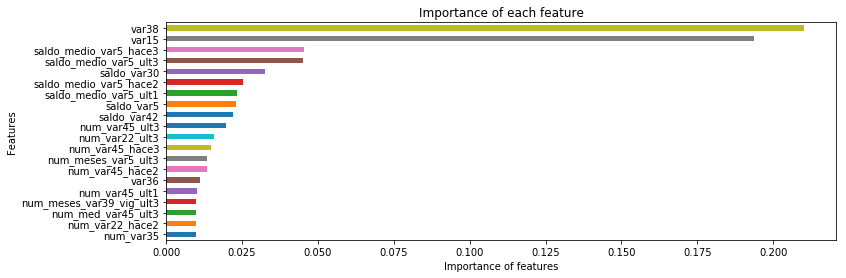

In [31]:
def imp_plot(clf,X_train):
    feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
    feat_importances = feat_importances.nlargest(20)
    feat_importances=feat_importances.sort_values()
    feat_importances.plot(kind='barh')
    plt.xlabel('Importance of features')
    plt.ylabel('Features')
    plt.title('Importance of each feature')               
 
imp_plot(clf,X_train)

    From the model diagnostics it is obvious that the model is overfitting.
    Training results look good but this is not the case with the test.
    We can try to create more cases of the unbalanced category and optimise the parameters.

In [32]:
############## Balancing ##############
X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_train2 = X_train2.assign(TARGET=y_train.values)
X_test2 = X_test2.assign(TARGET=y_test.values)
# Separate majority and minority classes
df_majority = X_train2[X_train2.TARGET==0]
df_minority = X_train2[X_train2.TARGET==1]
# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=25000,    # to match majority class
                                 random_state=123)# reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
train=df_upsampled
train.TARGET.value_counts()

0.0    51074
1.0    25000
Name: TARGET, dtype: int64

In [33]:
#Run the same forest, changing some parameters to optimise it
clf2 = RandomForestClassifier(random_state=10,n_estimators=300,max_features=150,max_depth=8)
clf2.fit(train.loc[:, train.columns != 'TARGET'], train['TARGET'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=150, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [34]:
print_results(X_train=train.loc[:, train.columns != 'TARGET'],X_test=X_test2.loc[:, X_test2.columns != 'TARGET'],y_train=train['TARGET'],y_test=X_test2['TARGET'],clf=clf2)

 Confusion matrix on train:
 Predicted Unsat.    0.0    1.0
 Actual Unsat.                
0.0               45276   5798
1.0                7791  17209

 Confusion matrix on test:
 Predicted Unsat.    0.0   1.0
 Actual Unsat.               
0.0               19291  2647
1.0                 357   511

 Train precision score : 74.80 %
 Train recall score    : 68.84 %
 Test precision score  : 16.18 %
 Test recall score     : 58.87 %
 Accuracy on train     : 82.14 %
 Accuracy on test      : 86.83 %
 AUC Train: 0.8867487809844539
 Gini Train: 0.7734975619689077
 AUC Test: 0.8403898680949622
 Gini Test: 0.6807797361899244


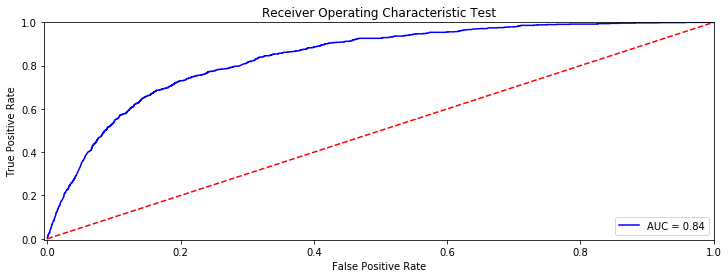

In [35]:
create_roc_curve(y_test=X_test2['TARGET'],X_test=X_test2.loc[:, X_test2.columns != 'TARGET'],clf=clf2)  

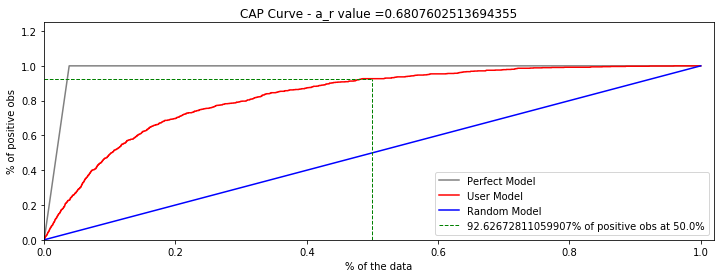

In [36]:
cap_curve(y_test=X_test2['TARGET'],X_test=X_test2.loc[:, X_test2.columns != 'TARGET'],clf=clf2)

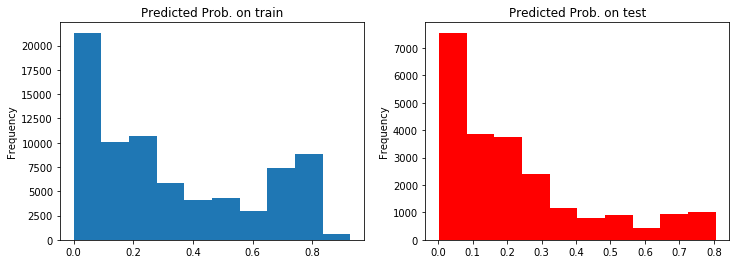

In [37]:
prob_plot(X_train=train.loc[:, train.columns != 'TARGET'],X_test=X_test2.loc[:, X_test2.columns != 'TARGET'],clf=clf2)

In [38]:
decile_cut(y_train=train['TARGET'],x_train=train.loc[:, train.columns != 'TARGET'],clf=clf2,cut=10)  

                  TARGET SUM  Obs Count  Penetration %
Decile                                                
(-0.001, 0.0272]        28.0       7619       0.367502
(0.0272, 0.0665]       110.0       7597       1.447940
(0.0665, 0.0987]       485.0       7606       6.376545
(0.0987, 0.18]         562.0       7717       7.282623
(0.18, 0.245]         1198.0       7498      15.977594
(0.245, 0.327]        2192.0       7635      28.709889
(0.327, 0.505]        3334.0       7580      43.984169
(0.505, 0.699]        4935.0       7633      64.653478
(0.699, 0.769]        5718.0       7585      75.385630
(0.769, 0.928]        6438.0       7604      84.665965


In [39]:
decile_cut(y_train=X_test2['TARGET'],x_train=X_test2.loc[:, X_test2.columns != 'TARGET'],clf=clf2,cut=10)    

                                 TARGET SUM  Obs Count  Penetration %
Decile                                                               
(0.0008600000000000001, 0.0224]         2.0       2281       0.087681
(0.0224, 0.049]                         5.0       2281       0.219202
(0.049, 0.0734]                        12.0       2280       0.526316
(0.0734, 0.0943]                       21.0       2282       0.920245
(0.0943, 0.162]                        24.0       2279       1.053093
(0.162, 0.21]                          46.0       2281       2.016659
(0.21, 0.25]                           67.0       2280       2.938596
(0.25, 0.364]                          86.0       2281       3.770276
(0.364, 0.58]                         177.0       2280       7.763158
(0.58, 0.805]                         428.0       2281      18.763700


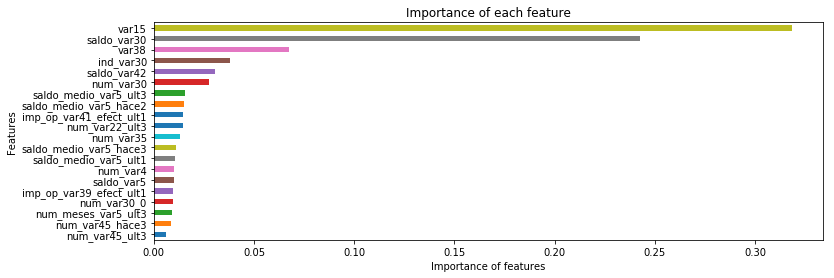

In [40]:
imp_plot(clf=clf2,X_train=train.loc[:, train.columns != 'TARGET'])       

    After balancing and optimising some of the parameters the results have been improved on the test.
    In addition, we can perform grid search with cross-validays to optimise even more the parameters.
    Furthermore, the rank of variable importance has changed.
    In any case the optomised model should be tested in an out of time sample to assest it's stability.

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in ['TARGET', 'IDcol']]
param_test1 = {'max_features':list(range(30,181,60))}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(random_state=10,n_estimators=300,max_depth=8),
param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
gsearch1.fit(train[predictors],train['TARGET'])    

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(3800,4801,200))}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=400, max_features='sqrt', random_state=10),
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train['TARGET'])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

    Grid search was taking a lot of time to execute thus I stopped it. I would expect a further improvent of 10% in
    the final results.